In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime 

## Read Data

In [3]:
df = pd.read_csv("accidents.csv")
df.drop('Unnamed: 0', 1, inplace=True)

In [8]:
df.shape

(36016, 27)

In [9]:
df.head()

,Accident_Time,Accident_Date_G,Rno,Road_Type,Region,Road_Status,Weather_Status,Dead_Number,Injuries_Number,Damage_Road_Type,...,Vehicle,Animal,Vehicles_Number,Paints,Eyes,Road_Close_Days,Road_Close_Hours,GEOMETRIC_RoadTYPE,long,lat
0,5:00 AM,16/04/2019,425,سريع مع خدمة,Qassim,Good,good,0.0,1.0,NaN,...,NaN,NaN,1.0,1.0,1.0,NaN,NaN,Straight link,43.999093,26.426746
1,12:15 PM,16/04/2019,414,مزدوج,Qassim,Good,good,0.0,1.0,NaN,...,NaN,NaN,2.0,1.0,1.0,NaN,NaN,Straight link,43.786877,26.057596
2,8:30 AM,15/04/2019,419,مزدوج,Qassim,Good,good,0.0,0.0,NaN,...,NaN,NaN,2.0,1.0,1.0,NaN,NaN,Straight link,43.772701,26.345146
3,8:30 PM,15/04/2019,60,سريع مع خدمة,Qassim,Good,good,0.0,0.0,NaN,...,NaN,NaN,2.0,1.0,1.0,NaN,NaN,Straight link,43.937996,26.205702
4,12:10 AM,14/04/2019,393,NaN,Hail,Good,good,NaN,NaN,NaN,...,NaN,NaN,2.0,1.0,1.0,NaN,NaN,Straight link,41.702023,27.555157


## Fix dates

In [10]:
def add_datepart(df, field_name:str, drop:bool=True, time:bool=False):
    "Helper function that adds columns relevant to a date in the column `field_name` of `df`."         
    field = df[field_name]                                                                             
    prefix = re.sub('[Dd]ate$', '', field_name)
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
            'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'] 
    if time: attr = attr + ['Hour', 'Minute', 'Second']
    for n in attr: df[prefix + n] = getattr(field.dt, n.lower())
    df[prefix + 'Elapsed'] = field.astype(np.int64) // 10 ** 9
    if drop: df.drop(field_name, axis=1, inplace=True) 
    return df

In [11]:
df['acc_datetime'] = pd.to_datetime(df.Accident_Date_G+' '+df.Accident_Time, format='%d/%m/%Y %I:%M %p')
df['acc_date'] = pd.to_datetime(df.Accident_Date_G, format='%d/%m/%Y')
df = add_datepart(df, field_name='acc_datetime', drop=False, time=True)
# df['acc_time']`

In [12]:
df.loc[:, ['Accident_Date_G', 'Accident_Time', 'acc_datetime', 'acc_date', 'acc_datetimeMonth']].sample(10)

,Accident_Date_G,Accident_Time,acc_datetime,acc_date,acc_datetimeMonth
23351,18/09/2017,7:00 AM,2017-09-18 07:00:00,2017-09-18,9
4059,16/12/2018,3:30 AM,2018-12-16 03:30:00,2018-12-16,12
18948,20/12/2017,11:10 PM,2017-12-20 23:10:00,2017-12-20,12
3928,21/12/2018,12:30 PM,2018-12-21 12:30:00,2018-12-21,12
29390,17/05/2017,12:50 PM,2017-05-17 12:50:00,2017-05-17,5
2793,21/01/2019,5:30 AM,2019-01-21 05:30:00,2019-01-21,1
20084,25/11/2017,6:00 PM,2017-11-25 18:00:00,2017-11-25,11
19565,06/12/2017,7:30 PM,2017-12-06 19:30:00,2017-12-06,12
24196,01/09/2017,8:00 AM,2017-09-01 08:00:00,2017-09-01,9
6033,29/10/2018,8:30 AM,2018-10-29 08:30:00,2018-10-29,10


In [14]:
pd.pivot_table(df.groupby(['Accident_Type', 'Road_Type']).size().to_frame().reset_index(), 
               values=0, 
               columns='Road_Type', 
               index='Accident_Type', 
               aggfunc='sum', 
               fill_value=0,
               margins=True)

Road_Type,سريع,سريع اتجاهين,سريع مع خدمة,عقبة,مزدوج,مفرد,All
Accident_Type,,,,,,,
Explosion of a car tire,508,0,11,2,274,157,952
burning or ignition,301,2,8,11,209,131,662
collateral crush,127,0,1,0,86,29,243
coup,2742,25,29,38,3198,1974,8006
coup and crash,293,0,9,2,112,53,469
crash,6703,10,33,127,5309,2922,15104
crush from behind,1008,0,62,0,593,134,1797
crush with a stationary body on the road,145,0,0,6,141,57,349
deflection,1498,16,51,31,898,449,2943


In [15]:
pd.pivot_table(df.groupby(['Accident_Type', 'Road_Type'])['Dead_Number'].sum().to_frame().reset_index(),
                values='Dead_Number', 
               columns='Road_Type', 
               index='Accident_Type', 
               aggfunc='sum', 
               fill_value=0,
               margins=True)

Road_Type,سريع,سريع اتجاهين,سريع مع خدمة,عقبة,مزدوج,مفرد,All
Accident_Type,,,,,,,
Explosion of a car tire,33,0,0,0,29,17,79.0
burning or ignition,14,0,0,0,8,11,33.0
collateral crush,0,0,0,0,3,6,9.0
coup,278,4,2,21,434,346,1085.0
coup and crash,56,0,0,0,25,16,97.0
crash,478,1,0,9,671,994,2153.0
crush from behind,62,0,2,0,52,15,131.0
crush with a stationary body on the road,4,0,0,7,9,3,23.0
deflection,44,1,1,4,55,41,146.0


In [47]:
def plot_mean_per_freq(df, freq='day', date_col='acc_datetime', agg_col=['Dead_Number', 'Injuries_Number']):
    sample = 't' if freq=='minute' else freq[0]
    sampled_df = df.resample(sample, on=date_col)[agg_col].sum().reset_index()
    sampled_df[freq] = getattr(sampled_df[date_col].dt, freq)
    sampled_df.groupby(freq)[agg_col].mean().plot.bar(figsize=(10,10))

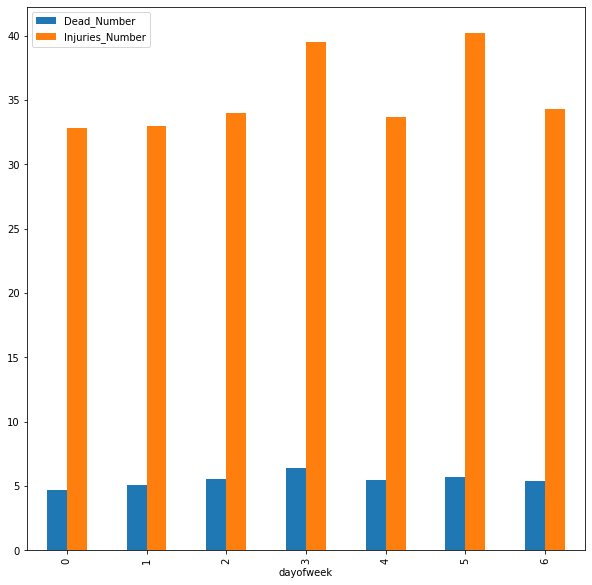

In [57]:
plot_mean_per_freq(df, freq='month', date_col='acc_datetime', agg_col=['Dead_Number', 'Injuries_Number'])

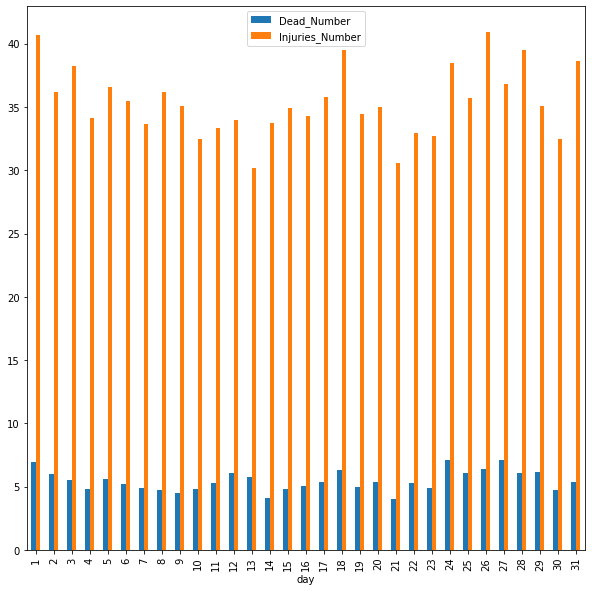

In [51]:
plot_mean_per_freq(df, freq='day', date_col='acc_datetime', agg_col=['Dead_Number', 'Injuries_Number'])

In [ ]:
plot_mean_per_freq(df, freq='d', date_col='acc_datetime', agg_col=['Dead_Number', 'Injuries_Number'])

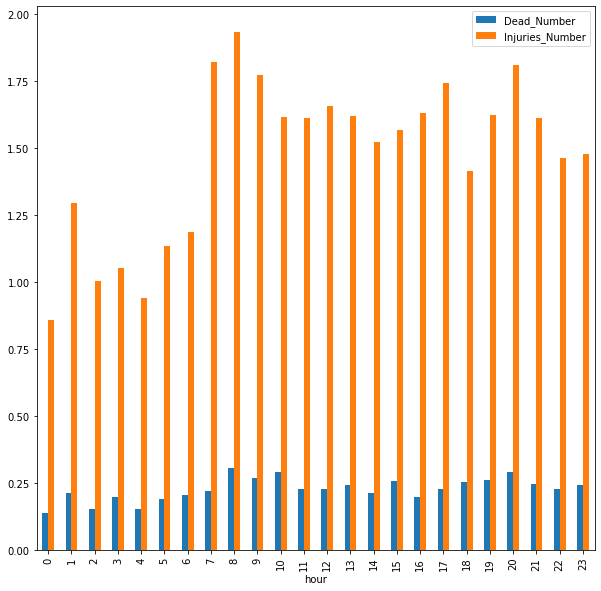

In [52]:
plot_mean_per_freq(df, freq='hour', date_col='acc_datetime', agg_col=['Dead_Number', 'Injuries_Number'])

In [175]:
df.groupby('acc_datetimeMonth')[['Dead_Number', 'Injuries_Number']].agg(['sum', 'mean', 'count'])


Dead_Number                 Injuries_Number                
                          sum      mean count             sum      mean count
acc_datetimeMonth                                                            
1                       496.0  0.205809  2410          3397.0  1.127448  3013
2                       417.0  0.168145  2480          2906.0  0.970608  2994
3                       398.0  0.141285  2817          3114.0  0.946505  3290
4                       370.0  0.155332  2382          2447.0  0.896337  2730
5                       394.0  0.187798  2098          2476.0  1.004462  2465
6                       453.0  0.214184  2115          2693.0  1.115114  2415
7                       449.0  0.229082  1960          2197.0  0.976879  2249
8                       340.0  0.193843  1754          2211.0  1.071740  2063
9                       333.0  0.209040  1593          1986.0  1.010173  1966
10                      316.0  0.179852  1757          2094.0  0.991008  2113
11                      311.0  0.181130  1717          2017.0  0.962768  2095
12                      293.0  0.178224  1644          2024.0  1.016575  1991